## Objective:
The main goal of this project is likely to forecast future stock prices based on historical data. Predicting stock prices accurately is challenging due to the complex and volatile nature of financial markets. However, machine learning techniques, particularly deep learning models like LSTM, have shown promise in capturing patterns and trends in stock price movements.

## Dependencies:
Python 3.x: The programming language used for development.
pandas: A powerful data manipulation library used for handling structured data.
numpy: A fundamental package for scientific computing with Python, used for numerical operations.
matplotlib: A popular plotting library for creating visualizations in Python.
seaborn: Another visualization library that works well with pandas data structures.
scikit-learn: A comprehensive machine learning library for Python, likely used for data preprocessing and possibly for comparison with LSTM.
TensorFlow (Keras): TensorFlow is a widely-used deep learning framework, and Keras is a high-level API that simplifies building and training neural networks. In this case, it's specifically mentioned for implementing the LSTM model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [3]:
main_path = 'C:/Users/Admin/Desktop/NYSE Stock Price Prediction/'

In [4]:
df = pd.read_csv(main_path + 'prices.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
print(df.shape)

(851264, 7)


In [6]:
df.describe(include='all')

,date,symbol,open,close,low,high,volume
count,851264,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,3524,501,NaN,NaN,NaN,NaN,NaN
top,2016-12-30,KSU,NaN,NaN,NaN,NaN,NaN
freq,498,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,NaN,NaN,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,NaN,NaN,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,NaN,NaN,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,NaN,NaN,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,NaN,NaN,79.879997,79.889999,79.110001,80.610001,5.222500e+06


In [7]:
df['symbol'].unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [8]:
print(len(df['symbol'].unique()))

501


In [9]:
 df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [10]:
df['date'].unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [11]:
comp_info = pd.read_csv(main_path+'securities.csv')

In [12]:
comp_info.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877


In [13]:
comp_info['Ticker symbol'].nunique()

505

In [14]:
comp_info.loc[comp_info.Security.str.startswith('Face'), :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [15]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


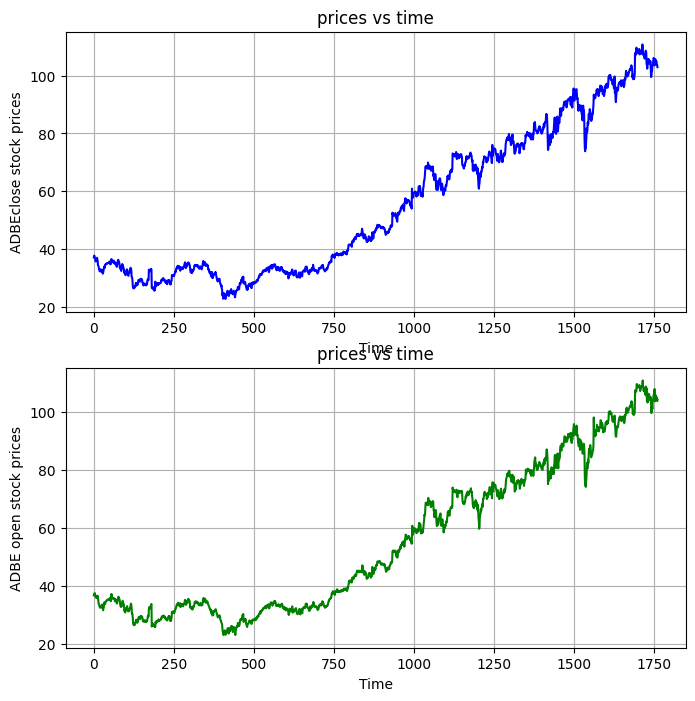

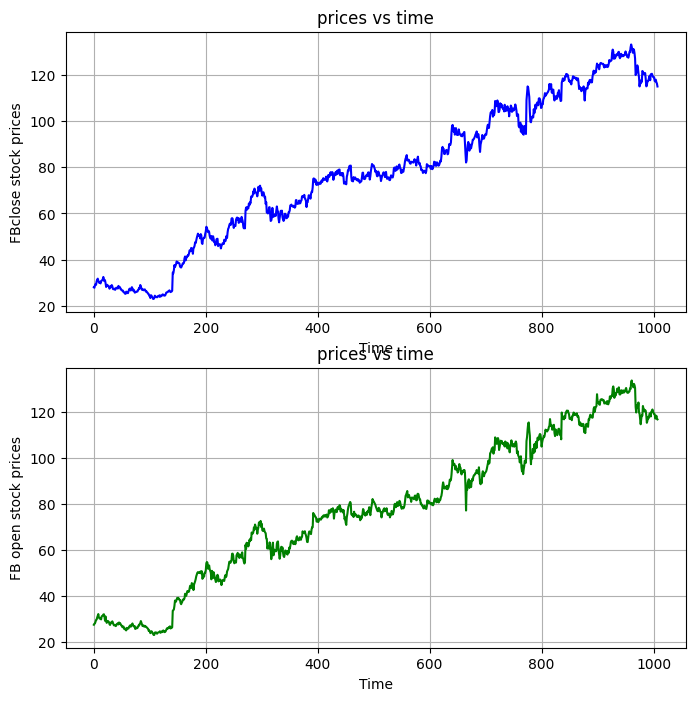

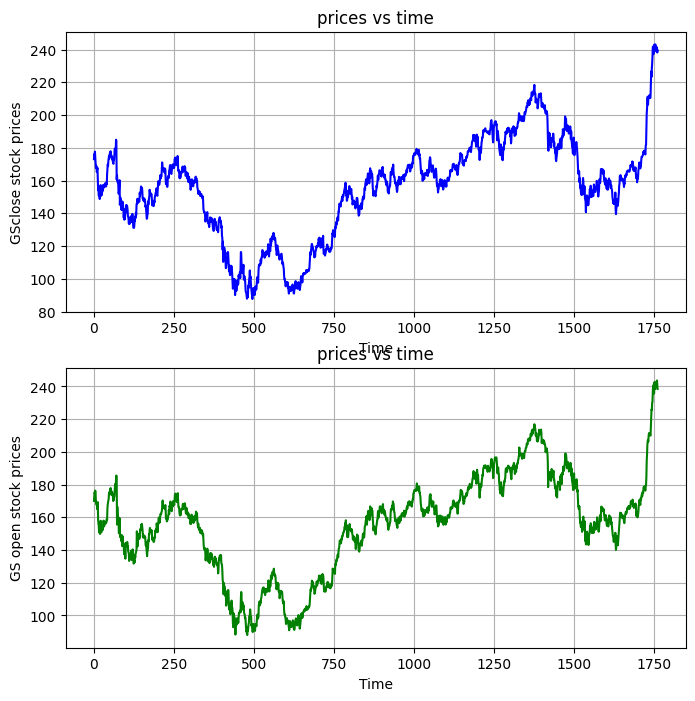

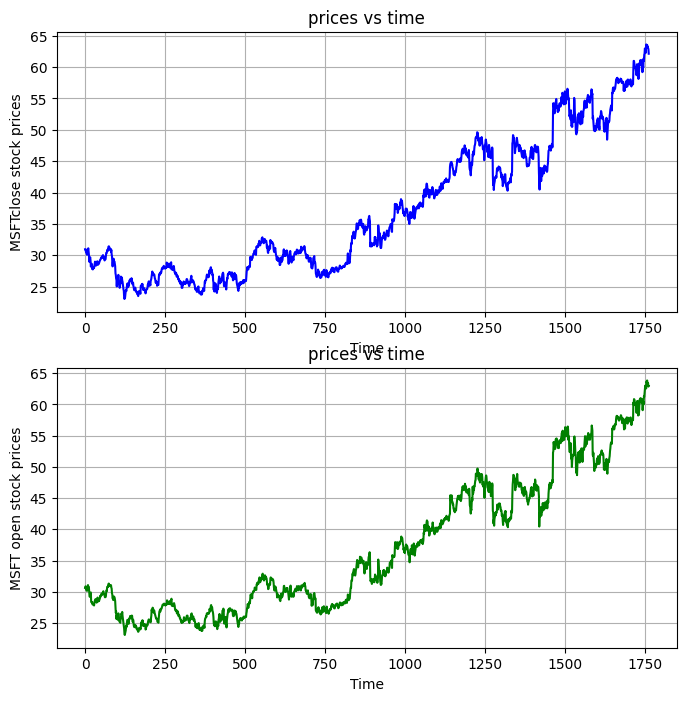

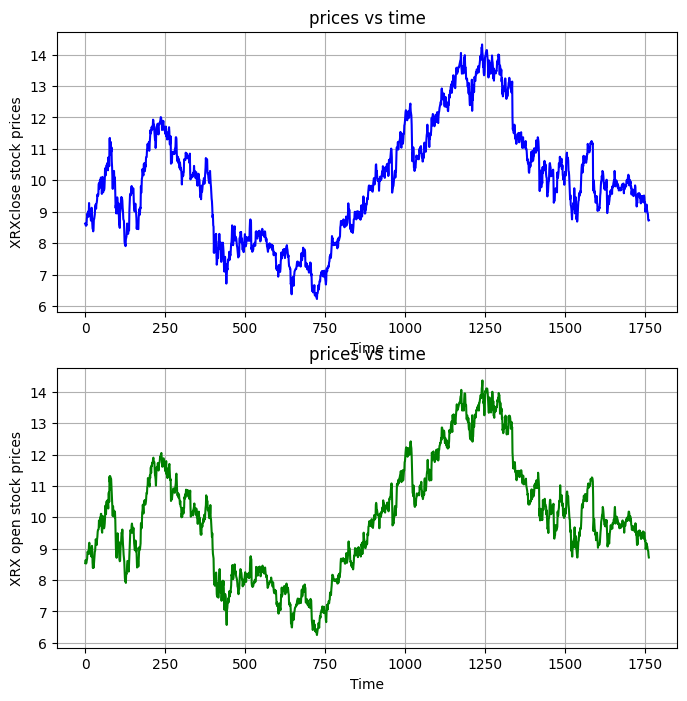

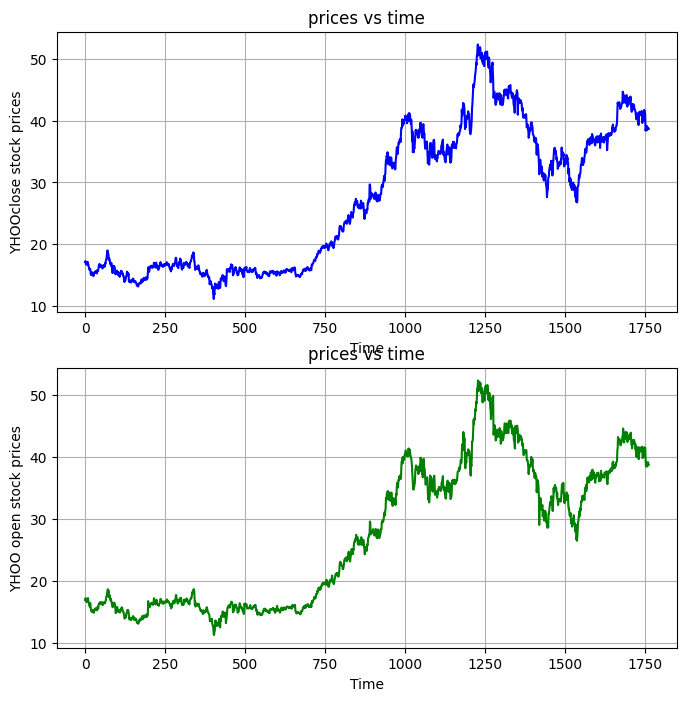

In [18]:
def plotter(code):
    
    global closing_stock,  opening_stock
    
    f, axs = plt.subplots(2,2,figsize=(8,8))
    
    plt.subplot(212)
    
    company = df[df['symbol']==code]
    
    company = company.open.values.astype('float32')
    
    company = company.reshape(-1,1)
    
    opening_stock = company
    
    plt.grid(True)
    
    plt.xlabel('Time')
    
    plt.ylabel(code + ' open stock prices')
    
    plt.title('prices vs time')
    
    plt.plot(company,  'g')
    
    plt.subplot(211)
    
    company_close = df[df['symbol'] == code]
    
    company_close = company_close.close.values.astype('float32')
    
    company_close = company_close.reshape(-1, 1)
    
    closing_stock = company_close
    
    plt.xlabel('Time')
    
    plt.ylabel(code + 'close stock prices')
    
    plt.title('prices vs time')
    
    plt.grid(True)
    
    plt.plot(company_close, 'b')
    
    plt.show()
    
for comp in comp_plot:
    plotter(comp)
    

In [19]:
closing_stock[:, 0]

array([17.1 , 17.23, 17.17, ..., 38.73, 38.64, 38.67], dtype=float32)

In [20]:
stocks = closing_stock[:, 0]

print(stocks)

stocks = stocks.reshape(len(stocks),  1)

[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

stocks = scaler.fit_transform(stocks)

In [22]:
train = int(len(stocks) * 0.80)
test = len(stocks) - train

In [23]:
print(train, test)

1409 353


In [24]:
train = stocks[0:train]
print(train)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]]


In [25]:
test = stocks[len(train):]

In [26]:
train = train.reshape(len(train), 1)
test = test.reshape(len(test), 1)

In [27]:
def process_data(data, n_features):
    dataX, dataY = [], []
    
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        
        dataX.append(a)
        
        dataY.append(data[i + n_features, 0])
        
    return np.array(dataX), np.array(dataY)

In [28]:
n_features = 2

trainX, trainY = process_data(train, n_features)

testX, testY = process_data(test, n_features)

print(trainX.shape , trainY.shape , testX.shape , testY.shape)

(1406, 2) (1406,) (350, 2) (350,)


In [29]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

In [30]:
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [31]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [32]:
filepath = 'C:/Users/Admin/Desktop/stock_preidctor.hdf5'

In [33]:
lr_reduce = ReduceLROnPlateau(monitor='val-loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [34]:
model = Sequential()

model.add(GRU(256, input_shape = (1, n_features), return_sequences = True))

model.add(Dropout(0.4))

model.add(LSTM(256))

model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))

model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            199680    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-trai

In [35]:
model.compile(loss='mean_squared_error',
             optimizer=Adam(lr=0.0005),
             metrics = ['mean_squared_error'])

In [36]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [38]:
history = model.fit(trainX, trainY, 
                    epochs=100, 
                    batch_size=128, 
                    callbacks = [checkpoint, lr_reduce],
                    validation_data = (testX, testY))

Epoch 1/100
 9/11 [=======================>......] - ETA: 0s - loss: 6.9354e-04 - mean_squared_error: 6.9354e-04
Epoch 1: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 20ms/step - loss: 7.2038e-04 - mean_squared_error: 7.2038e-04 - val_loss: 3.0286e-04 - val_mean_squared_error: 3.0286e-04 - lr: 5.0000e-04
Epoch 2/100
 7/11 [==================>...........] - ETA: 0s - loss: 8.0863e-04 - mean_squared_error: 8.0863e-04
Epoch 2: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 15ms/step - loss: 7.6700e-04 - mean_squared_error: 7.6700e-04 - val_loss: 3.0678e-04 - val_mean_squared_error: 3.0678e-04 - lr: 5.0000e-04
Epoch 3/100
 7/11 [==================>...........] - ETA: 0s - loss: 6.5186e-04 - mean_squared_error: 6.5186e-04
Epoch 3: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 11ms/step - loss: 6.7348e-04 - mean_squared_error: 6.7348e-04 - val_loss: 3.5573e-04 - val_mean_squared_error:

11/11 [==============================] - 0s 10ms/step - loss: 6.7446e-04 - mean_squared_error: 6.7446e-04 - val_loss: 3.5006e-04 - val_mean_squared_error: 3.5006e-04 - lr: 5.0000e-04
Epoch 17/100
 8/11 [====================>.........] - ETA: 0s - loss: 6.9266e-04 - mean_squared_error: 6.9266e-04
Epoch 17: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.5561e-04 - mean_squared_error: 6.5561e-04 - val_loss: 3.1234e-04 - val_mean_squared_error: 3.1234e-04 - lr: 5.0000e-04
Epoch 18/100
 9/11 [=======================>......] - ETA: 0s - loss: 6.9870e-04 - mean_squared_error: 6.9870e-04
Epoch 18: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.8785e-04 - mean_squared_error: 6.8785e-04 - val_loss: 2.9640e-04 - val_mean_squared_error: 2.9640e-04 - lr: 5.0000e-04
Epoch 19/100
 9/11 [=======================>......] - ETA: 0s - loss: 6.1919e-04 - mean_squared_error: 6.1919e-04
Epoch 19: val

 8/11 [====================>.........] - ETA: 0s - loss: 6.6578e-04 - mean_squared_error: 6.6578e-04
Epoch 32: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.6993e-04 - mean_squared_error: 6.6993e-04 - val_loss: 2.9101e-04 - val_mean_squared_error: 2.9101e-04 - lr: 5.0000e-04
Epoch 33/100
 9/11 [=======================>......] - ETA: 0s - loss: 5.8712e-04 - mean_squared_error: 5.8712e-04
Epoch 33: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.0708e-04 - mean_squared_error: 6.0708e-04 - val_loss: 2.9414e-04 - val_mean_squared_error: 2.9414e-04 - lr: 5.0000e-04
Epoch 34/100
 9/11 [=======================>......] - ETA: 0s - loss: 6.7872e-04 - mean_squared_error: 6.7872e-04
Epoch 34: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.8194e-04 - mean_squared_error: 6.8194e-04 - val_loss: 3.4665e-04 - val_mean_squared_error: 3.4665

11/11 [==============================] - 0s 10ms/step - loss: 5.8837e-04 - mean_squared_error: 5.8837e-04 - val_loss: 2.8857e-04 - val_mean_squared_error: 2.8857e-04 - lr: 5.0000e-04
Epoch 48/100
 8/11 [====================>.........] - ETA: 0s - loss: 6.5752e-04 - mean_squared_error: 6.5752e-04
Epoch 48: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.2340e-04 - mean_squared_error: 6.2340e-04 - val_loss: 2.8822e-04 - val_mean_squared_error: 2.8822e-04 - lr: 5.0000e-04
Epoch 49/100
 8/11 [====================>.........] - ETA: 0s - loss: 6.1336e-04 - mean_squared_error: 6.1336e-04
Epoch 49: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 11ms/step - loss: 6.2058e-04 - mean_squared_error: 6.2058e-04 - val_loss: 3.1967e-04 - val_mean_squared_error: 3.1967e-04 - lr: 5.0000e-04
Epoch 50/100
 9/11 [=======================>......] - ETA: 0s - loss: 5.7393e-04 - mean_squared_error: 5.7393e-04
Epoch 50: val

 8/11 [====================>.........] - ETA: 0s - loss: 6.3331e-04 - mean_squared_error: 6.3331e-04
Epoch 63: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 6.2672e-04 - mean_squared_error: 6.2672e-04 - val_loss: 3.0254e-04 - val_mean_squared_error: 3.0254e-04 - lr: 5.0000e-04
Epoch 64/100
10/11 [==========================>...] - ETA: 0s - loss: 5.3099e-04 - mean_squared_error: 5.3099e-04
Epoch 64: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 5.2609e-04 - mean_squared_error: 5.2609e-04 - val_loss: 2.8674e-04 - val_mean_squared_error: 2.8674e-04 - lr: 5.0000e-04
Epoch 65/100
 9/11 [=======================>......] - ETA: 0s - loss: 6.0969e-04 - mean_squared_error: 6.0969e-04
Epoch 65: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 10ms/step - loss: 5.9941e-04 - mean_squared_error: 5.9941e-04 - val_loss: 2.8639e-04 - val_mean_squared_error: 2.8639

11/11 [==============================] - 0s 11ms/step - loss: 6.1055e-04 - mean_squared_error: 6.1055e-04 - val_loss: 2.8825e-04 - val_mean_squared_error: 2.8825e-04 - lr: 5.0000e-04
Epoch 79/100
10/11 [==========================>...] - ETA: 0s - loss: 5.7564e-04 - mean_squared_error: 5.7564e-04
Epoch 79: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 11ms/step - loss: 5.7009e-04 - mean_squared_error: 5.7009e-04 - val_loss: 3.7255e-04 - val_mean_squared_error: 3.7255e-04 - lr: 5.0000e-04
Epoch 80/100
 8/11 [====================>.........] - ETA: 0s - loss: 6.3838e-04 - mean_squared_error: 6.3838e-04
Epoch 80: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 12ms/step - loss: 6.2062e-04 - mean_squared_error: 6.2062e-04 - val_loss: 3.0215e-04 - val_mean_squared_error: 3.0215e-04 - lr: 5.0000e-04
Epoch 81/100
 8/11 [====================>.........] - ETA: 0s - loss: 5.8607e-04 - mean_squared_error: 5.8607e-04
Epoch 81: val

10/11 [==========================>...] - ETA: 0s - loss: 5.7015e-04 - mean_squared_error: 5.7015e-04
Epoch 94: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 9ms/step - loss: 5.5914e-04 - mean_squared_error: 5.5914e-04 - val_loss: 2.9279e-04 - val_mean_squared_error: 2.9279e-04 - lr: 5.0000e-04
Epoch 95/100
 7/11 [==================>...........] - ETA: 0s - loss: 5.4193e-04 - mean_squared_error: 5.4193e-04
Epoch 95: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 13ms/step - loss: 5.7139e-04 - mean_squared_error: 5.7139e-04 - val_loss: 2.8159e-04 - val_mean_squared_error: 2.8159e-04 - lr: 5.0000e-04
Epoch 96/100
 7/11 [==================>...........] - ETA: 0s - loss: 5.7748e-04 - mean_squared_error: 5.7748e-04
Epoch 96: val_loss did not improve from 0.13805
11/11 [==============================] - 0s 12ms/step - loss: 5.5261e-04 - mean_squared_error: 5.5261e-04 - val_loss: 2.8611e-04 - val_mean_squared_error: 2.8611e

In [39]:
pred = model.predict(testX)

pred = scaler.inverse_transform(pred)

pred[:10]

11/11 [==============================] - 1s 3ms/step


array([[36.738186],
       [35.30464 ],
       [36.07995 ],
       [36.642555],
       [36.60334 ],
       [36.244698],
       [35.776554],
       [34.825813],
       [33.67493 ],
       [32.140675]], dtype=float32)

In [40]:
testY = testY.reshape(testY.shape[0] , 1)

testY = scaler.inverse_transform(testY)

testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


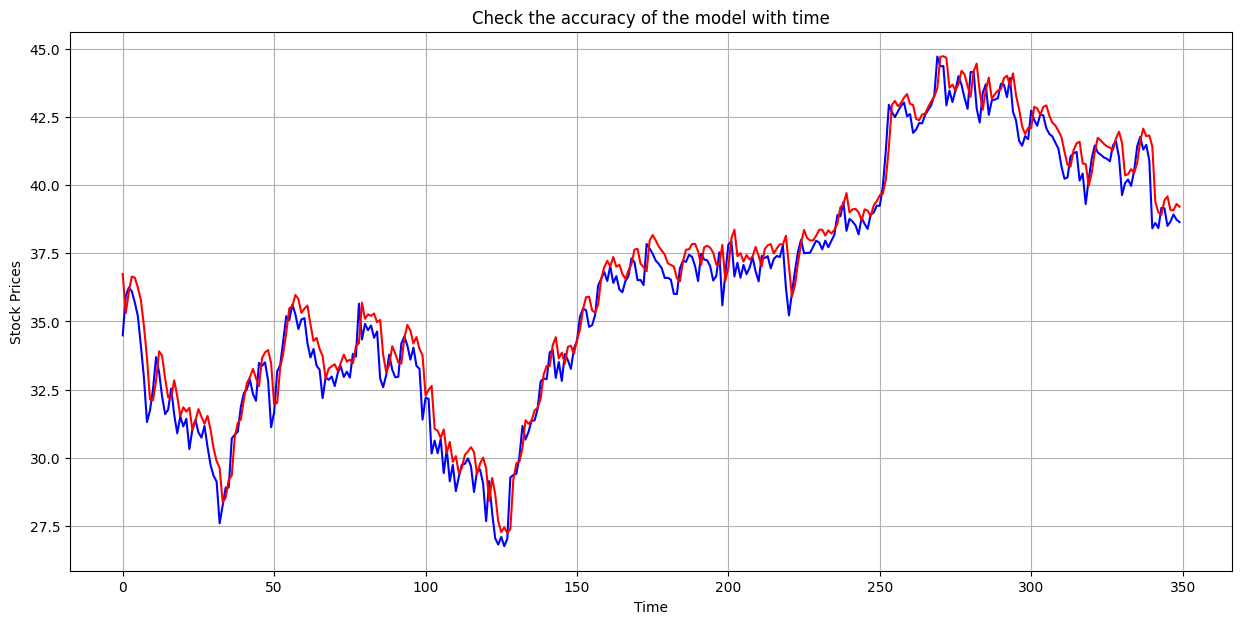

In [41]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)

plt.plot(testY , 'b')

plt.plot(pred , 'r')

plt.xlabel('Time')

plt.ylabel('Stock Prices')

plt.title('Check the accuracy of the model with time')

plt.grid(True)

plt.show()